In [1]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import natasha

In [2]:
df = pd.read_csv("parced_data/train_data.csv", index_col=0)


In [3]:
from natasha import (
    Segmenter,
    MorphVocab,

    NewsEmbedding,
    NewsMorphTagger,

    Doc
)

In [4]:
stop_pos = {'ADP',
 'ADV',
 'AUX',
 'CCONJ',
 'DET',
 'NUM',
 'PART',
 'PRON',
 'PUNCT',
 'SCONJ',
 'SYM'}


1


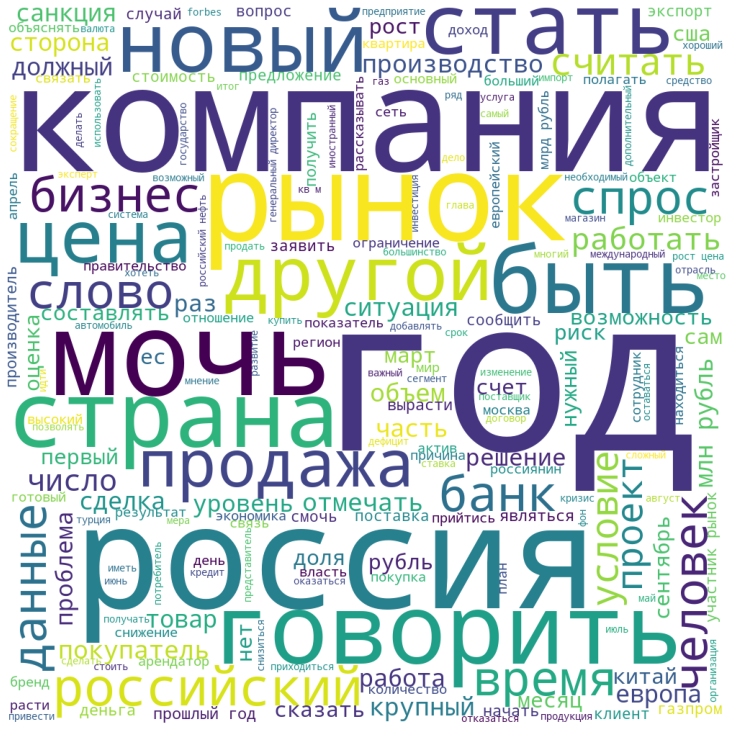

2


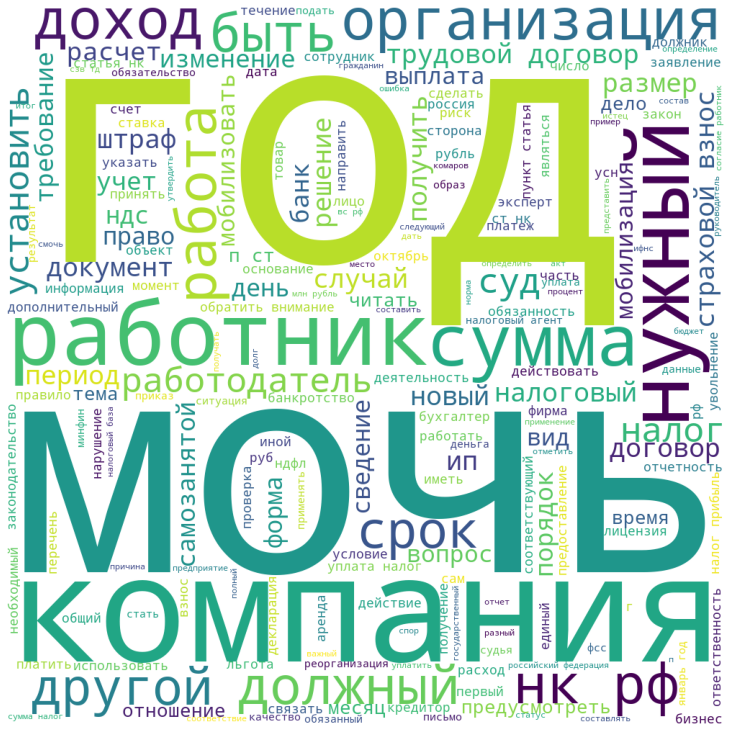

3


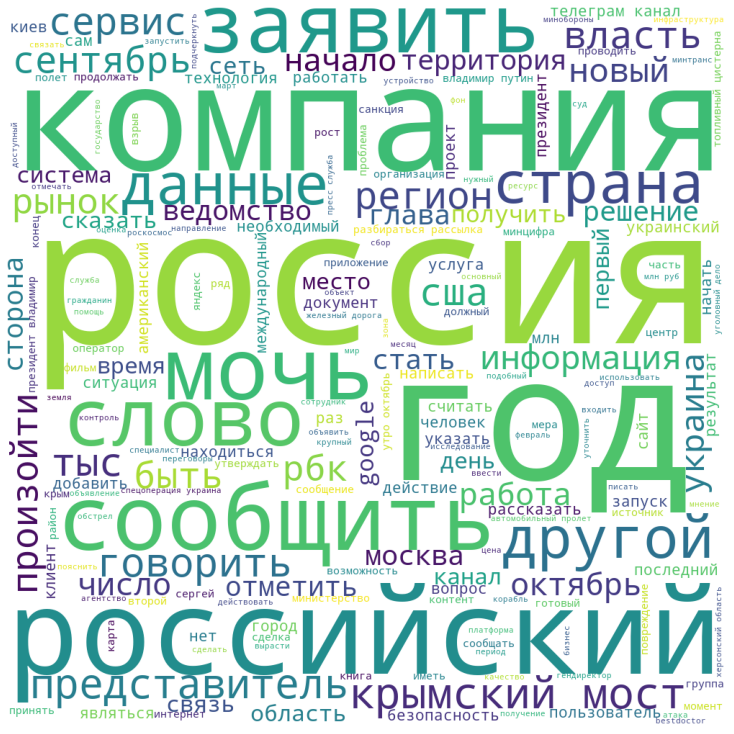

In [6]:
segmenter = Segmenter()
morph_vocab = MorphVocab()
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)

for label, data in df.groupby("category"):
    print(label)
    full_text = ' '.join(data["text"].astype(str))
    doc = Doc(full_text)
    doc.segment(segmenter)
    doc.tag_morph(morph_tagger)
    for token in doc.tokens: token.lemmatize(morph_vocab)
    full_cleared_text = ' '.join(token.lemma for token in doc.tokens if token.pos not in stop_pos)
    wordcloud = WordCloud(width=1000, height=1000,
                      background_color='white',
                      stopwords=STOPWORDS,
                      min_font_size=10).generate(full_cleared_text)

    # plot the WordCloud image
    plt.figure(figsize=(10, 10), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)

    plt.show()